# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [248]:
import pandas as pd
import numpy as np

In [249]:
import seaborn as sns

### ipython magic to plot in a notebook

In [250]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [251]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

### Open the saved text in Jupyter

In [252]:
f = open('livedeal.txt','r')

### Convert opened file to Pandas dataframe.

In [253]:
k = f.readlines()

In [254]:
r = k[0].split(',')

In [255]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [256]:
testlist = []
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(headposition[i-1], headposition[i])
        #print(r[headposition[i-1] : headposition[i]])
        testlist.append(r[headposition[i-1] : headposition[i]])

In [257]:
df = pd.DataFrame(testlist)

In [258]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,"{""deals"":[{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,"""status"":1","""blockedBalance"":""436741483005997728""","""totalPayout"":""11255425987916045371""","""lastBillTS"":""2018-08-23T21:19:40Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None
1,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,"""status"":1","""blockedBalance"":""527294171989791505""","""totalPayout"":""13635145922955896850""","""lastBillTS"":""2018-08-23T21:19:10Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None
2,"{""deal"":{""id"":""3458""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""1776104355885276""","""totalPayout"":""605167269121193362""","""lastBillTS"":""2018-08-23T21:15:46Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None
3,"{""deal"":{""id"":""3457""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""1776104355885276""","""totalPayout"":""605174808601418108""","""lastBillTS"":""2018-08-23T21:15:22Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None
4,"{""deal"":{""id"":""4641""","""benchmarks"":{""values"":[286",1079,2,256000000,67108864,1000000,1000000,1,4232052736,...,"""status"":1","""blockedBalance"":""215600976558482601""","""totalPayout"":""15313888625565932247""","""lastBillTS"":""2018-08-23T21:15:13Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None


## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [259]:
df[14]

0     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
1     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
2     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
3     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
4     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
5     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
6     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
7     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
8     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
9     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
10    "consumerID":"0x417c92FbD944b125A578848DE44a4F...
11    "consumerID":"0x417c92FbD944b125A578848DE44a4F...
12    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
13    "consumerID":"0x49f6C95B97C209F814c5b3B13428E9...
14    "consumerID":"0x417c92FbD944b125A578848DE44a4F...
15    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
16    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
17    "consumerID":"0x417c92FbD944b125A578848DE4

### Make a little funtion to trim unnecessary charactors

In [260]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [261]:
df['consumer_ID'] = df[14].apply(Supplier_ID_conversion)

In [262]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,"""blockedBalance"":""436741483005997728""","""totalPayout"":""11255425987916045371""","""lastBillTS"":""2018-08-23T21:19:40Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911
1,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,"""blockedBalance"":""527294171989791505""","""totalPayout"":""13635145922955896850""","""lastBillTS"":""2018-08-23T21:19:10Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911
2,"{""deal"":{""id"":""3458""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""blockedBalance"":""1776104355885276""","""totalPayout"":""605167269121193362""","""lastBillTS"":""2018-08-23T21:15:46Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb
3,"{""deal"":{""id"":""3457""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""blockedBalance"":""1776104355885276""","""totalPayout"":""605174808601418108""","""lastBillTS"":""2018-08-23T21:15:22Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb
4,"{""deal"":{""id"":""4641""","""benchmarks"":{""values"":[286",1079,2,256000000,67108864,1000000,1000000,1,4232052736,...,"""blockedBalance"":""215600976558482601""","""totalPayout"":""15313888625565932247""","""lastBillTS"":""2018-08-23T21:15:13Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [263]:
df[13]

0     "supplierID":"0xC1bf17F560FA5BF79aF72B4314d147...
1     "supplierID":"0xC1bf17F560FA5BF79aF72B4314d147...
2     "supplierID":"0x7Cc1C96E6c20D6265531196d9ca2b3...
3     "supplierID":"0x8546601F9b4AcF1dc99C72cc48ED24...
4     "supplierID":"0x730F19B7FA079EBfDc7360066ec593...
5     "supplierID":"0x734C2a165e57496169aAAEA6E22aE7...
6     "supplierID":"0xA0885038D127f628B3DC7f406004dE...
7     "supplierID":"0xA0885038D127f628B3DC7f406004dE...
8     "supplierID":"0x38B904701577720d4Eb06b5d28A7bd...
9     "supplierID":"0x38B904701577720d4Eb06b5d28A7bd...
10    "supplierID":"0x33f81Ee6f9d4716B1C13bA58FdAE5a...
11    "supplierID":"0x10B3Fe7B225b9fF0294CAa76d5d9F8...
12    "supplierID":"0xaE7DB91DeC00E3Be062C7dC3328859...
13    "supplierID":"0xAe4fD4581D82C615105c798c73d1C3...
14    "supplierID":"0x7C339f2cfeeDFDB1748a15E466F6bb...
15    "supplierID":"0xd8B606a3D19C53E6Eea84ca5738D7D...
16    "supplierID":"0x70eC78FAF2CcD3fA3fe9567Fa5B835...
17    "supplierID":"0x33f81Ee6f9d4716B1C13bA58Fd

In [264]:
df['supplier_ID'] = df[13].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [265]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [266]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [267]:
df['price_USD/h'] = df[18].apply(Price_conversion)

###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [268]:
df[10]

0      26663000
1      32454000
2             0
3             0
4      12220000
5      19778000
6      19827000
7      59499000
8      85863000
9      86487000
10     21715000
11    133203000
12            0
13            0
14    135831000
15    159643000
16    129860000
17     21707000
18    186411000
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26     30105000
27     21959000
28            0
29            0
30            0
31            0
Name: 10, dtype: object

In [269]:
float(df[10][0])/1000000

26.663

In [270]:
def Ethash_conversion(content):
    return float(content)/1000000

In [271]:
Ethash_conversion(df[10][0])

26.663

In [272]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [273]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663
1,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454
2,"{""deal"":{""id"":""3458""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0.000100,0.000
3,"{""deal"":{""id"":""3457""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0.000100,0.000
4,"{""deal"":{""id"":""4641""","""benchmarks"":{""values"":[286",1079,2,256000000,67108864,1000000,1000000,1,4232052736,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,0.011386,12.220


# Run statistics for suppliers

In [274]:
df.groupby('supplier_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
supplier_ID,,,,,,,,
0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,1.0,133.2030,NaN,133.203,133.20300,133.2030,133.20300,133.203
0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,1.0,21.9590,NaN,21.959,21.95900,21.9590,21.95900,21.959
0x2f1B94E3813d66967a478031889F230D805130Ec,1.0,30.1050,NaN,30.105,30.10500,30.1050,30.10500,30.105
0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,2.0,21.7110,0.005657,21.707,21.70900,21.7110,21.71300,21.715
0x38B904701577720d4Eb06b5d28A7bd02a443711F,2.0,86.1750,0.441235,85.863,86.01900,86.1750,86.33100,86.487
0x672Ee945a55327328472B1a02437293945157f4C,1.0,186.4110,NaN,186.411,186.41100,186.4110,186.41100,186.411
0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,1.0,129.8600,NaN,129.860,129.86000,129.8600,129.86000,129.860
0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,1.0,12.2200,NaN,12.220,12.22000,12.2200,12.22000,12.220
0x734C2a165e57496169aAAEA6E22aE763fF8d7654,1.0,19.7780,NaN,19.778,19.77800,19.7780,19.77800,19.778


In [275]:
df10 = df.groupby('supplier_ID').describe()['Ethash']

In [276]:
df10.to_csv('eth.csv')

In [277]:
df11 = pd.read_csv('eth.csv')

In [278]:
df11['total_Ethash']= df11['count']*df11['mean']

In [279]:
df11[['supplier_ID','total_Ethash','count']]

,supplier_ID,total_Ethash,count
0,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0
1,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,21.959,1.0
2,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0
3,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,43.422,2.0
4,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,2.0
5,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
6,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
7,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,12.220,1.0
8,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,19.778,1.0
9,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,135.831,1.0


In [280]:
df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

,supplier_ID,total_Ethash,count
5,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
4,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,2.0
21,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0
9,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,135.831,1.0
0,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0
6,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
15,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,2.0
17,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0
3,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,43.422,2.0
2,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0


In [281]:
df12 = df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [282]:
df12.to_csv('ethash.csv', index = False)

In [283]:
df13 = pd.read_csv('ethash.csv')

In [284]:
df13

,supplier_ID,total_Ethash,count
0,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
1,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,2.0
2,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0
3,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,135.831,1.0
4,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0
5,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
6,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,2.0
7,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0
8,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,43.422,2.0
9,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0


In [285]:
df13['total_Ethash'].sum()

1183.2249999999999

In [286]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s')

Real-time total Ethash rate of the entire SONM platform is 1183.225 Mh/s


## supplier's revenue

In [287]:
df13['supplier_ID'][0]

'0x672Ee945a55327328472B1a02437293945157f4C'

In [288]:
df[df.supplier_ID == df13['supplier_ID'][0]]['price_USD/h'].sum()

0.18636595769999881

In [289]:
def total_revenue(address):
    return df[df.supplier_ID == address]['price_USD/h'].sum()

In [290]:
total_revenue(df13['supplier_ID'][0])

0.18636595769999881

In [291]:
df13['total_revenue_USD/h'] = df13['supplier_ID'].apply(total_revenue)

In [292]:
df13.dtypes

supplier_ID             object
total_Ethash           float64
count                  float64
total_revenue_USD/h    float64
dtype: object

In [293]:
df13['total_revenue_USD/d'] = df13['total_revenue_USD/h'] *24

In [294]:
df13['revenue_USD/d'] = df13['total_revenue_USD/d'].map('${:,.2f}'.format)

In [295]:
df13.head()

,supplier_ID,total_Ethash,count,total_revenue_USD/h,total_revenue_USD/d,revenue_USD/d
0,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,0.186366,4.472783,$4.47
1,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,2.0,0.151156,3.627737,$3.63
2,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0,0.162238,3.893711,$3.89
3,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,135.831,1.0,0.120389,2.889348,$2.89
4,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0,0.115931,2.782335,$2.78


In [296]:
sns.set()

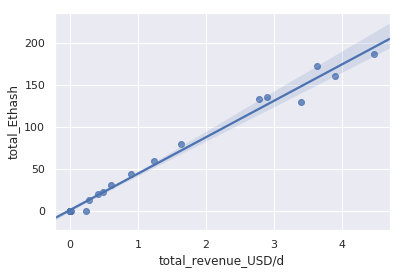

In [297]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/d", data=df13)

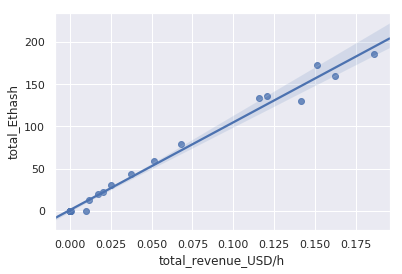

In [298]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df13)

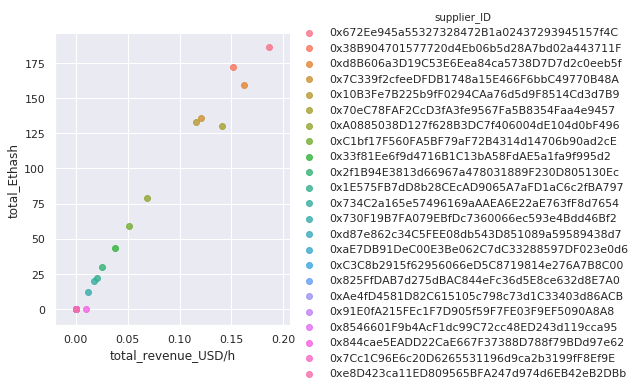

In [299]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df13, fit_reg=False, hue='supplier_ID', legend=True)

In [300]:
df13[['supplier_ID','total_Ethash','count','revenue_USD/d']]

,supplier_ID,total_Ethash,count,revenue_USD/d
0,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,$4.47
1,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,2.0,$3.63
2,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0,$3.89
3,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,135.831,1.0,$2.89
4,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0,$2.78
5,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0,$3.39
6,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,2.0,$1.64
7,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0,$1.23
8,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,43.422,2.0,$0.90
9,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0,$0.61


In [301]:
df13['total_revenue_USD/d'].sum()

26.860746367464309

In [302]:
df13['total_revenue_USD/d'].sum()

26.860746367464309

In [303]:
"{:.2f}".format(df13['total_revenue_USD/d'].sum())

'26.86'

In [304]:
print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day is spent on the entire SONM platform.')

At this moment, total 26.86 USD/day is spent on the entire SONM platform.


# Run the same statistics for consumers

In [305]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,12.0,40.677833,72.231737,0.000,0.000,0.0000,41.630,186.411
0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,56.094333,43.925866,19.778,21.713,31.2795,86.019,135.831
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.0000,0.000,0.000
0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.0000,0.000,0.000
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.9590,21.959,21.959
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.0000,0.000,0.000
0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.0000,0.000,0.000
0xe7517190DB97Ea55E985abdA33745AfC41a83592,1.0,0.000000,NaN,0.000,0.000,0.0000,0.000,0.000


In [306]:
df10 = df.groupby('consumer_ID').describe()['Ethash']

In [307]:
df10.to_csv('consumer.csv')

In [308]:
df11 = pd.read_csv('consumer.csv')

In [309]:
df11['total_Ethash']= df11['mean']*df11['count']

In [310]:
df11

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,12.0,40.677833,72.231737,0.000,0.000,0.0000,41.630,186.411,488.134
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,56.094333,43.925866,19.778,21.713,31.2795,86.019,135.831,673.132
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.0000,0.000,0.000,0.000
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.0000,0.000,0.000,0.000
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.9590,21.959,21.959,21.959
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.0000,0.000,0.000,0.000
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.0000,0.000,0.000,0.000
7,0xe7517190DB97Ea55E985abdA33745AfC41a83592,1.0,0.000000,NaN,0.000,0.000,0.0000,0.000,0.000,0.000


In [311]:
def total_expense(address):
    return df[df.consumer_ID == address]['price_USD/h'].sum()

In [312]:
df11['total_expense_USD/h'] = df11['consumer_ID'].apply(total_expense)

In [313]:
df11['total_expense_USD/d'] = df11['total_expense_USD/h'] *24

In [314]:
df11['expense_USD/d'] = df11['total_expense_USD/d'].map('${:,.2f}'.format)

In [315]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,12.0,40.677833,72.231737,0.000,0.000,0.0000,41.630,186.411,488.134,5.020297e-01,1.204871e+01,$12.05
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,56.094333,43.925866,19.778,21.713,31.2795,86.019,135.831,673.132,5.870278e-01,1.408867e+01,$14.09
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.0000,0.000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.0000,0.000,0.000,0.000,3.110400e-10,7.464960e-09,$0.00
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.9590,21.959,21.959,21.959,2.014018e-02,4.833642e-01,$0.48


In [316]:
df11[['consumer_ID', 'total_Ethash', 'count','expense_USD/d']]

,consumer_ID,total_Ethash,count,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,488.134,12.0,$12.05
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,673.132,12.0,$14.09
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0.000,3.0,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,0.000,1.0,$0.00
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,21.959,1.0,$0.48
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.000,1.0,$0.24
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,0.000,1.0,$0.00
7,0xe7517190DB97Ea55E985abdA33745AfC41a83592,0.000,1.0,$0.00


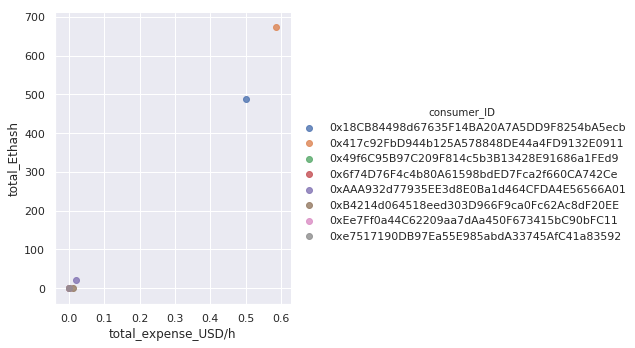

In [317]:
sns.lmplot( y="total_Ethash", x="total_expense_USD/h", data=df11, fit_reg=False, hue='consumer_ID', legend=True)

# Connor's deals

In [318]:
df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663
1,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454
5,"{""deal"":{""id"":""4835""","""benchmarks"":{""values"":[108",1113,8,512000000,67108864,1000000,1000001,1,6368002048,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Nk...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.017390,19.778
6,"{""deal"":{""id"":""4889""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,1,6373244928,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.017390,19.827
7,"{""deal"":{""id"":""4888""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,3,6372196352,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.050831,59.499
8,"{""deal"":{""id"":""4896""","""benchmarks"":{""values"":[108",1094,2,512000000,67108864,1000000,1000000,3,8508145664,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x38B904701577720d4Eb06b5d28A7bd02a443711F,0.075355,85.863
9,"{""deal"":{""id"":""4895""","""benchmarks"":{""values"":[108",1094,2,512000000,67108864,1000000,1000000,3,8507097088,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x38B904701577720d4Eb06b5d28A7bd02a443711F,0.075801,86.487
10,"{""deal"":{""id"":""4830""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Yj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.715
11,"{""deal"":{""id"":""4874""","""benchmarks"":{""values"":[104",1301,2,512000000,67108864,1000000,1000000,5,8513388544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.115931,133.203
14,"{""deal"":{""id"":""4903""","""benchmarks"":{""values"":[103",1288,2,512000000,67108864,1000000,1000000,5,8223842304,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...

In [319]:
df12 = df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

In [320]:
df12[['consumer_ID', 'supplier_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,price_USD/h,Ethash,0
0,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663,"{""deals"":[{""deal"":{""id"":""4837"""
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454,"{""deal"":{""id"":""4836"""
5,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.017390,19.778,"{""deal"":{""id"":""4835"""
6,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.017390,19.827,"{""deal"":{""id"":""4889"""
7,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.050831,59.499,"{""deal"":{""id"":""4888"""
8,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x38B904701577720d4Eb06b5d28A7bd02a443711F,0.075355,85.863,"{""deal"":{""id"":""4896"""
9,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x38B904701577720d4Eb06b5d28A7bd02a443711F,0.075801,86.487,"{""deal"":{""id"":""4895"""
10,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.715,"{""deal"":{""id"":""4830"""
11,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.115931,133.203,"{""deal"":{""id"":""4874"""
14,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,0.120389,135.831,"{""deal"":{""id"":""4903"""


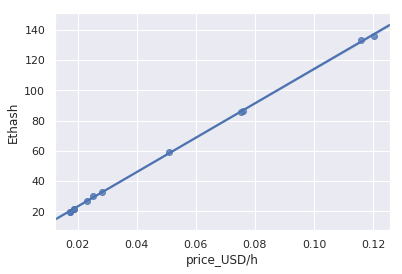

In [321]:
sns.regplot( y="Ethash", x="price_USD/h", data=df12)

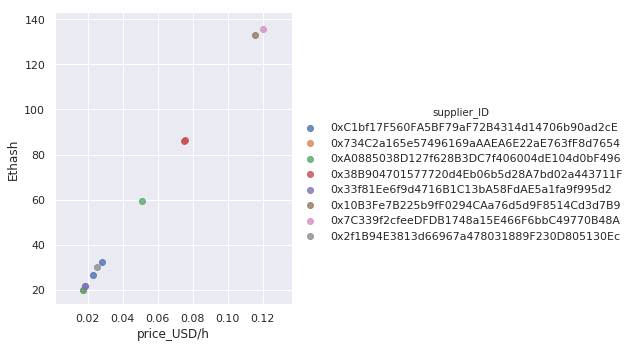

In [322]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='supplier_ID', legend=True)

# Conclusions

In [323]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s.')

Real-time total Ethash rate of the entire SONM platform is 1183.225 Mh/s.


In [324]:
print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day is spent on the entire SONM platform.')

At this moment, total 26.86 USD/day is spent on the entire SONM platform.


In [325]:
print('Connor currently has '+ str(len(df12)) + ' deals.')

Connor currently has 12 deals.


In [326]:
print('Connor currently pays ' + str("{:.2f}".format(df12['price_USD/h'].sum()*24)) + " USD/day.") 

Connor currently pays 14.09 USD/day.


In [327]:
print('Connor currently mines ETH with ' + str(df12['Ethash'].sum()) + ' Mh/s hashrate.')

Connor currently mines ETH with 673.132 Mh/s hashrate.


In [328]:
print('There are '+ str(len(df13))+ ' unique suppliers at this moment.')

There are 23 unique suppliers at this moment.


In [329]:
print('There are '+ str(len(df11))+ ' unique consumers at this moment.')

There are 8 unique consumers at this moment.


In [330]:
print('Currently, there are ' + str(len(df13[df13['total_Ethash']>0])) + ' unique GPU sppliers.')

Currently, there are 13 unique GPU sppliers.


In [331]:
print('There are ' + str(len(df13)-len(df13[df13['total_Ethash']>0])) + ' unique CPU sppliers at this moment.')

There are 10 unique CPU sppliers at this moment.


In [332]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s.')

print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day is spent on the entire SONM platform.')

print('Connor currently has '+ str(len(df12)) + ' deals.')

print('Connor currently pays ' + str("{:.2f}".format(df12['price_USD/h'].sum()*24)) + " USD/day.") 

print('Connor currently mines ETH with ' + str(df12['Ethash'].sum()) + ' Mh/s hashrate.')

print('There are '+ str(len(df13))+ ' unique suppliers at this moment.')

print('There are ' + str(len(df13[df13['total_Ethash']>0])) + ' unique GPU sppliers at this moment.')

print('There are ' + str(len(df13)-len(df13[df13['total_Ethash']>0])) + ' unique CPU sppliers at this moment.')

print('There are '+ str(len(df11))+ ' unique consumers at this moment.')

print('Currenlty, there are total '+ str(len(df)) + ' deals.')

print('Of which ' + str(len(df[df.Ethash>0])) + ' deals contain GPU.')

print('And ' + str(len(df[df.Ethash==0])) + ' deals are CPU only.')




Real-time total Ethash rate of the entire SONM platform is 1183.225 Mh/s.
At this moment, total 26.86 USD/day is spent on the entire SONM platform.
Connor currently has 12 deals.
Connor currently pays 14.09 USD/day.
Connor currently mines ETH with 673.132 Mh/s hashrate.
There are 23 unique suppliers at this moment.
There are 13 unique GPU sppliers at this moment.
There are 10 unique CPU sppliers at this moment.
There are 8 unique consumers at this moment.
Currenlty, there are total 32 deals.
Of which 17 deals contain GPU.
And 15 deals are CPU only.


In [333]:
print('Currenlty, there are total '+ str(len(df)) + ' deals.')

Currenlty, there are total 32 deals.


In [334]:
print('There are ' + str(len(df[df.Ethash>0])) + ' GPU deals.')

There are 17 GPU deals.


In [335]:
print('There are ' + str(len(df[df.Ethash==0])) + ' CPU only deals.')

There are 15 CPU only deals.
